In [1]:
import sys

sys.path.insert(1, 'C:/Users/UROP/OneDrive - Imperial College London/MAGPIE/python/synthPy/field_generator')
sys.path.insert(1, 'C:/Users/UROP/OneDrive - Imperial College London/MAGPIE/python/synthPy/utils')

import gaussian1D as g1
import matplotlib.pyplot as plt
import numpy as np
import cmpspec as cm

Generate a 1D field using FFT method.

In [2]:
def power_spectrum(k,a):
    return k**-a

def k41(k):
    return power_spectrum(k, 5/3)

n = 10000
field_1D = g1.gaussian1D(k41)

C:\Users\UROP\AppData\Local\Temp\ipykernel_23896\3985641994.py:2: RuntimeWarning: divide by zero encountered in power
  return k**-a
C:\Users/UROP/OneDrive - Imperial College London/MAGPIE/python/synthPy/field_generator\gaussian1D.py:142: RuntimeWarning: invalid value encountered in multiply
  F = W*np.sqrt(self.k_func(K)) # power spectra follows power law, so sqrt here.


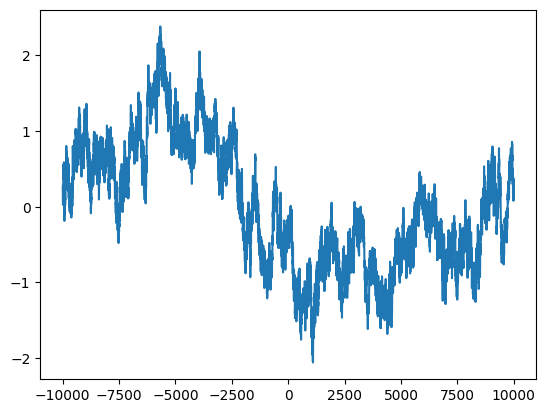

In [3]:
d = 1
sig = field_1D.fft(n, d)
x = np.arange(-n*d, n*d + d, d)
sig_proc = sig - np.average(sig)
plt.plot(x, sig)


Calculate the Power Spectrum:

C:\Users\UROP\AppData\Local\Temp\ipykernel_23896\3985641994.py:2: RuntimeWarning: divide by zero encountered in power
  return k**-a


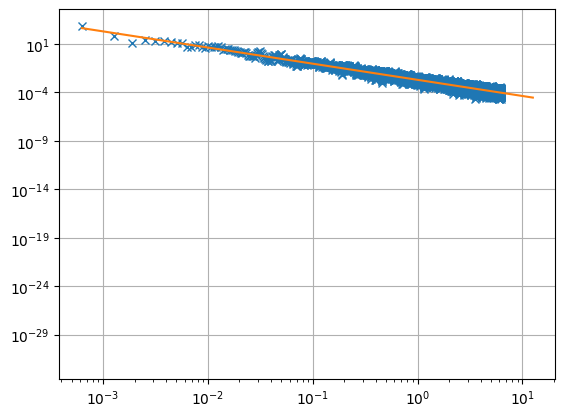

In [4]:


_, wn, ps = cm.compute1Dspectrum(sig_proc, n, 1)
plt.plot(wn,ps, 'x')
plt.plot(wn, 0.002*k41(wn))
plt.grid()
plt.xscale('log')
plt.yscale('log')





3D generation:

In [5]:
import gaussian3D as g3

field_3D = g3.gaussian3D(k41)
N = 100
sig = field_3D.fft(100)

C:\Users\UROP\AppData\Local\Temp\ipykernel_23896\3985641994.py:2: RuntimeWarning: divide by zero encountered in power
  return k**-a
C:\Users/UROP/OneDrive - Imperial College London/MAGPIE/python/synthPy/field_generator\gaussian3D.py:202: RuntimeWarning: invalid value encountered in multiply
  F = W*np.sqrt(self.k_func(K)) # power spectra follows power law, so sqrt here.


plot data


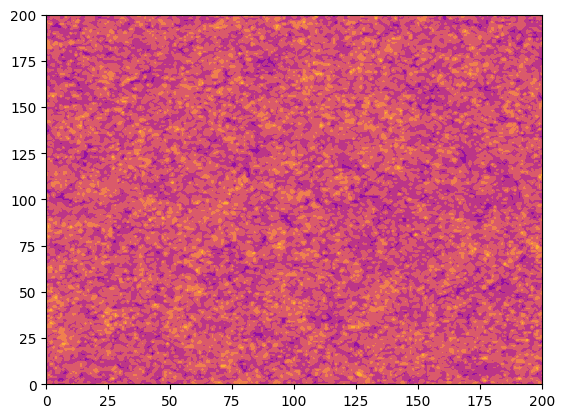

In [6]:
ax, fig = plt.subplots()
M = 2*N +1
X, Y = np.meshgrid(np.arange(0,201),np.arange(0,201))
cp = plt.contourf(X, Y, sig[:,:,1], cmap = 'plasma')


2D GEN AND SAVE TEST

In [7]:
import gaussian2D as g2

field_2D = g2.gaussian2D(k41)
N = 100
sig = field_2D.fft(100)

C:\Users\UROP\AppData\Local\Temp\ipykernel_23896\3985641994.py:2: RuntimeWarning: divide by zero encountered in power
  return k**-a
C:\Users/UROP/OneDrive - Imperial College London/MAGPIE/python/synthPy/field_generator\gaussian2D.py:176: RuntimeWarning: invalid value encountered in multiply
  F = W*np.sqrt(self.k_func(K)) # power spectra follows power law, so sqrt here.


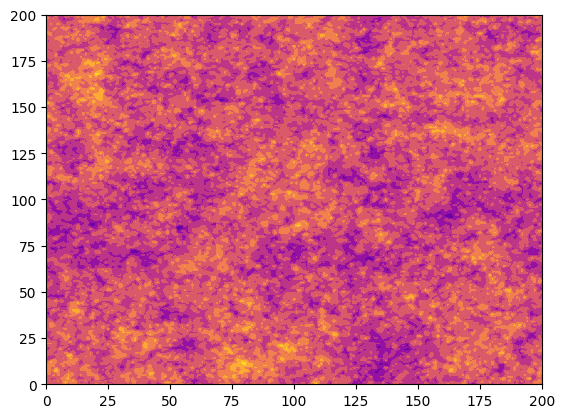

In [8]:
ax, fig = plt.subplots()
M = 2*N +1
X, Y = np.meshgrid(np.arange(0,201),np.arange(0,201))
cp = plt.contourf(X, Y, sig[:,:], cmap = 'plasma')

In [12]:
field_2D.export_scalar_field(fname = './test')

100


In [15]:
import pickle

ne = pickle.load( open("Jupyter Tests\test.pkl", "rb" ) )
print(ne[:,1])

EOFError: Ran out of input

It wokrs!
